# Rapid API Email Extraction


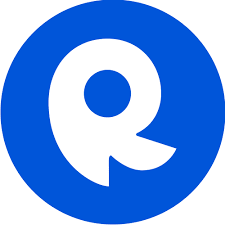

## This project uses Rapid API to find the business information based on a query. The purpose of this project is to find business in the New Jersey area, extract their email infomation, and use the application SNOW.IO to extract emails within that domain, and use REPLY.IO to automatically reach those business and offer facility cleaning services. 

In [4]:
#import dependencies and create api query
import requests
from rapid_api import api_key

url = "https://local-business-data.p.rapidapi.com/search"

querystring = {"query":"Dentist office in Central New Jersey","limit":"50","lat":"37.359428","lng":"-121.925337","zoom":"13","language":"en","region":"us"}

headers = {
	"X-RapidAPI-Key": api_key,
	"X-RapidAPI-Host": "local-business-data.p.rapidapi.com"
}

businesses = requests.get(url, headers=headers, params=querystring).json()
offices = businesses['data']

In [5]:
#create loop to extract only the desired information from the api response
#store desired information in list 
names = []
addresses = []
websites = []
numbers = []

for office in range(len(offices)):
    name = businesses['data'][office]['name']
    number = businesses['data'][office]['phone_number']
    address = businesses['data'][office]['address']
    website = businesses['data'][office]['website']
    names.append(name)
    numbers.append(number)
    addresses.append(address)
    websites.append(website)
  

In [6]:
#use lists to create a dataframe
import pandas as pd
data_df = pd.DataFrame({'Office': names,
                       'Address': addresses,
                       'Phone Number': numbers,
                       'Website': websites
                       })
data_df.head(50)

,Office,Address,Phone Number,Website
0,Central Dental Care,"137 Summit Ave, Summit, NJ 07901",+19082734688,https://www.centraldentalcarenj.com
1,Central Jersey Dental,"294 Applegarth Rd Ste H-1, Monroe Township, NJ...",+17322517766,http://centraljerseydental.com
2,T Dental PC,"450 Main St Suite 2, Metuchen, NJ 08840",+17329022828,https://www.tdentalnj.com
3,"Family Dental Practice of New Jersey, LLC","560 Newark Ave, Elizabeth, NJ 07208",+19083557800,http://www.familydentalpracticenj.com
4,"Mercer Smiles Family Dentistry | Family, Impla...","17 Main St Suite 301, Robbinsville Twp, NJ 08691",+16092708540,https://www.njsmilesdentistry.com
5,Park Family Dental,None,None,None
6,Central Jersey Dental Arts,"1056 Stelton Rd, Piscataway, NJ 08854",+17329811040,http://www.cjdentalarts.com
7,Scotch Plains Fanwood Dental Care,"44 S Martine Ave, Fanwood, NJ 07023",+19083223222,https://www.spfdentalcare.com
8,Unique Family Dentistry,"223 S Wood Ave, Linden, NJ 07036",+19087728640,https://www.uniquefamilydentistry.com
9,Union Family Dental,"2333 Morris Ave Suite A111, Union, NJ 07083",+19086877036,https://www.unionfamilydentalnj.com


In [8]:
#export csv file of the data frame
data_df.to_csv('../../output_files/rapid_api.csv')

In [13]:
#export a txt file with only emails to import into the reply.io application
file_path = '../../output_files/rapidapi_emails.txt'
emails = data_df['Website']
with open(file_path, 'a') as f:
    emails = emails.to_string(header=False, index=False)
    f.write(emails)